# Measuring rainfall-runoff

(RR_measuring_river_discharge)=
## Measuring river discharge

Discharge measurements aim to obtain a continuous record of *water levels* $h$ (NL: *Waterstand*). Additionally, by establishing the relationship between water level and discharge ($Q$ - $h$ curve, rating curve), the continuous water level recordings can be converted into a discharge hydrograph. The location of a gauging station for measuring river discharges is crucial; to obtain accurate results, the relationship between water level and discharge should be consistent and stable. The downstream hydraulic characteristics of the river that affect water level must also remain unchanged, and any measurable change in discharge should result in a clear change in water level. Furthermore, the station should remain accessible even during high flows.

The *cross-section* $A_c$ (NL: *Doorsnede*) of the watercourse is divided into a number of segments with height $h$ and width $b$ (area: $h \cdot b$) (see {numref}`fig:crosssection`). The average flow velocity can be determined for each segment $h \cdot b$. The flow velocity measurements should be taken in close proximity to the water level gauge that determines $h$, as the derived $Q$ - $h$ relationship may deviate otherwise.

```{figure} ../images/RFR_measurements_cswatercourse.png
---
height: 200px
name: fig:crosssection
---
Cross-section of a watercourse where area is divided in segments with height *h* and width *b*. (Own work)
```

The river discharge $Q$ is obtained by multiplying the average velocity over the vertical distance $h$ by the area of the segment $h \cdot b$, and then summing the discharges of all segments to obtain the total discharge across the cross-section $A_c$. Therefore:

$$
Q= \int v dA_c \approx \sum \overline{(vhb)} \quad \text{[L$^3$/T]}
$$ (Q)

Manual discharge measurements are conducted in straight sections of the river where flow lines are approximately parallel, and the water velocities are such that they can be measured using a conventional current meter ({numref}`fig:OTT` and {numref}`fig:OTTmeter`). A current meter registers the number of revolutions within a certain time, from which the average flow velocity can be derived.


```{figure} ../images/RFR_measurements_ottmolenfoto.png
---
height: 300px
name: fig:OTT
---
Measuring river discharge with a current meter – photo from {cite:p}`riverdischargemeasurement`.
```

```{figure} ../images/RFR_measurements_ottmolen.png
---
height: 300px
name: fig:OTTmeter
---
Schematization of a current meter (*OTT Hydromet*) – photo from {cite:p}`instropicsEVA`.
```

The Acoustic Doppler Current Profiler (ADCP) is another instrument that measures flow velocity and is based on the Doppler effect. It emits sound waves at a fixed frequency and listens for echoes from particles in the water, which reflect back with a Doppler-shifted frequency. This shift indicates the relative velocity between the ADCP and the scatterer. The ADCP's name reflects its usage of sound waves, Doppler effect, three-beam configuration, and profiling to generate velocity profiles. These profiles consist of uniformly spaced depth cells, each representing a depth range and providing an average velocity. This distinguishes ADCP from traditional point-based current meters.

## The $Q$-$h$ relationship

Determining a reliable relationship between the measured variable water level and the corresponding discharge is essential at gauging stations where continuous water level recordings need to be converted into continuous discharge records. This relationship depends on the characteristics of the river reach and the distance between the discharge measurement and water level recording. The condition of a natural river is usually not stable, so new discharge measurements need to be made from time to time; especially after high flows, a river can undergo significant changes, altering the $Q$ - $h$ relationship.

The discharge measurements $Q$ can be plotted against the corresponding water levels $h$, and usually, the points lie in such a way that an approximate parabolic curve can be drawn through them ({numref}`fig:Qhrelationship`).


The $Q$ - $h$ curve can often be approximately described by an equation of the form:

$$
Q = ah^b \quad \text{[L$^3$/T]}
$$ (Q_h)

However, it is usually the case that $h \neq 0$ when $Q=0$. To account for this, a correction needs to be applied:

$$
Q = a(h - h_0)^b \quad \text{[L$^3$/T]}
$$ (Q_h_curve)

The constants $a$, $b$, and $h_0$ can be determined using the method of least squares.

In [8]:
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import curve_fit

 # Provided data
 data_1991_92 = np.array([
     [1.47, 7.652], [4.67, 88.339], [3.35, 35.599], [2.77, 27.45],
     [2.43, 23.536], [2.28, 26.916], [3.16, 37.279], [2.49, 26.302],
     [1.69, 10.865], [1.64, 12.505], [1.44, 8.7], [1.43, 8.383]
 ])
 historic_floods = np.array([
     [7.38, 513.44], [6.77, 485.909], [6.76, 355.859], [6.76, 328.384],
     [5.9, 244.743], [5.76, 207.928], [5.28, 189.027], [5.45, 169.97],
     [4.73, 146.396], [4.65, 137.482], [4.45, 118.335], [4.1, 105.974],
     [4.73, 77.608], [4.18, 71.934], [3.95, 69.743], [3.45, 57.52],
     [3.67, 46.111], [3.65, 45.571], [3.53, 45.428], [3.79, 44.637],
     [3.05, 34.938], [2.77, 30.02], [2.82, 27.478], [2.28, 21.976],
     [1.92, 26.797], [2.49, 26.29]
 ])

 # Fit function for Q-h relationship
 def q_h_relationship(h, a, b, h0):
     return a * (h - h0) ** b

 # Fit lines for each dataset
 params_1991_92, _ = curve_fit(q_h_relationship, data_1991_92[:, 0], data_1991_92[:, 1], p0=[2, 1.5, 1])
 params_historic, _ = curve_fit(q_h_relationship, historic_floods[:, 0], historic_floods[:, 1], p0=[2, 1.5, 1])

 # Generate fitted curves
 h_fitted_1991_92 = np.linspace(min(data_1991_92[:, 0]), max(data_1991_92[:, 0]), 100)
 q_fitted_1991_92 = q_h_relationship(h_fitted_1991_92, *params_1991_92)

 h_fitted_historic = np.linspace(min(historic_floods[:, 0]), max(historic_floods[:, 0]), 100)
 q_fitted_historic = q_h_relationship(h_fitted_historic, *params_historic)

 # Create the plot
 fig = go.Figure()

 # Add the discharge measurements 1991/92
 fig.add_trace(go.Scatter(
     x=data_1991_92[:, 1], 
     y=data_1991_92[:, 0], 
     mode='markers', 
     name="Discharge Measurements Boane 1991/92",
     marker=dict(color='green', size=8, symbol='triangle-up')
 ))

 # Add the fitted line for 1991/92
 fig.add_trace(go.Scatter(
     x=q_fitted_1991_92, 
     y=h_fitted_1991_92, 
     mode='lines', 
     name="Fitted Line for 1991/92 Data",
     line=dict(color='green', dash='dot')
 ))

 # Add the historic flood data
 fig.add_trace(go.Scatter(
     x=historic_floods[:, 1], 
     y=historic_floods[:, 0], 
     mode='markers', 
     name="Historic Floods Boane",
     marker=dict(color='orange', size=8, symbol='square')
 ))

 # Add the fitted line for historic floods
 fig.add_trace(go.Scatter(
     x=q_fitted_historic, 
     y=h_fitted_historic, 
     mode='lines', 
     name="Fitted Line for Historic Floods",
     line=dict(color='orange', dash='dot')
 ))

 # Add tables for the datasets
 fig.add_trace(go.Table(
     header=dict(values=["H (Water Level)", "Q (Discharge)"], fill_color='lightgreen', align='left'),
     cells=dict(values=[data_1991_92[:, 0], data_1991_92[:, 1]], fill_color='white', align='left'),
     domain=dict(x=[0.7, 1], y=[0.5, 0.8]),
     name="1991/92 Data"
 ))

 fig.add_trace(go.Table(
     header=dict(values=["H (Water Level)", "Q (Discharge)"], fill_color='lightsalmon', align='left'),
     cells=dict(values=[historic_floods[:, 0], historic_floods[:, 1]], fill_color='white', align='left'),
     domain=dict(x=[0.7, 1], y=[0.2, 0.5]),
     name="Historic Flood Data Boane station"
 ))

 # Layout adjustments
 fig.update_layout(
     title="Q-h Relationship with Discharge Measurements Boane",
     xaxis_title="Discharge (Q) [m³/s]",
     yaxis_title="Water Level (h) [m]",
     template="plotly_white",
     legend_title_text="Legend",
     height=800,
     width = 1000
 )

 # Show the figure
 fig.show()


IndentationError: unexpected indent (84299964.py, line 6)

```{figure} ../images/RFR_measurements_qhrelationship.png
---
height: 0px
name: fig:Qhrelationship
---
*Q* - *h* relationship.
```

If the $Q$ - $h$ curve does not exhibit a smooth curve, it can be helpful to use a logarithmic scale (see {numref}`fig:Qhrelationlog`). The equation then becomes:

$$
\log Q = \log a + b \log(h - h_0) \quad \text{[-]}
$$ (Q_h_log)

If this equation describes multiple straight lines, the changes in slope can provide information about downstream boundary conditions.

```{figure} ../images/RFR_measurements_qhrelationshiplog.png
---
height: 300px
name: fig:Qhrelationlog
---
*Q* - *h* relationship on logarithmic scale. (Own work)
```

In {numref}`fig:Qhrelationlog`, it can be observed that at an $h-h_0$ value of approximately 0.7, a transition occurs to a different $Q$ - $h$ relationship. When such a transition can be clearly linked to an observed change in downstream boundary conditions such as a bridge blocking the flow, separate equations can be established for the different line segments. A change in the $Q$ - $h$ relationship opposite to {numref}`fig:Qhrelationlog` can also be caused by a significant alteration in the flow profile of a river, often associated with a distinct separation between a main channel or summer bed and the moment when the floodplains begin to flood, which have vastly different hydraulic properties. The above also implies that caution should be exercised when linearly extrapolating $Q$ - $h$ curves on a logarithmic scale.

(chezy-manning-flow)=
## Uniform Flow in Channels and Natural Watercourses

### Chézy and Manning

Various engineers have attempted to establish a good relationship for the discharge flowing through a watercourse when the water level is known at different points. Assuming uniform flow (constant discharge and hydraulic radius), the following relationships are applicable.

The discharge according to Chézy is given by:

$$
Q= A_c \overline{v}=C_zA_c\sqrt{Rs} \quad \text{[L$^3$/T]}
$$ (Qchezy)

The discharge according to Manning is given by:

$$
Q= A_c \overline{v}=\frac{A_cR^{2/3}s^{1/2}}{n_m} \quad \text{[L$^3$/T]}
$$ (Qstricklermanning)

where:

$$
R= \frac{A_c}{P_w} \quad \text{[L]} 
$$ (R)

```{figure} ../images/RFR_measurements_cswatercourse2.png
---
height: 200px
name: fig:general_crosssection
---
Cross-section of a watercourse. (Own work)
```

For an idealized cross-section, it holds that:

$$
A_c = (b+m\textit{h})\textit{h} \quad \text{[L$^2$]}   
$$(A)

and

$$
P_w =b+2\textit{h}\sqrt{1+m^2} \quad \text{[L]} 
$$(Pw)

```{figure} ../images/RFR_measurements_Idealizedcswatercourse.png
---
height: 200px
name: fig:ideal_crosssection
---
Idealized cross-section of a watercourse. (Own work)
```
```{figure} ../images/RFR_measurements_cslongprofile.png
---
height: 200px
name: fig:longitudinal_crosssection
---
Idealized longitudinal profile of a watercourse. (Own work)
```

where:

| | | |
| --- | --- | --- | 
| $Q$ |  Discharge | [L$^3$/T] |
| $A_c$  | Cross-sectional area of the watercourse | [L$^2$] |
| $v$  | Average flow velocity ($= Q/A_c$) | [L/T] |
| $R$  | Hydraulic radius | [L] |
| $P_w$  | Wetted perimeter of the watercourse | [L] |
| $s$  | Energy slope in the flow direction (in uniform flow, equal to bed slope or water surface slope) | [-] |
| $n_m$  | Manning roughness coefficient | [L$^{1/3}$/T] |
| $C_z$  | Chézy roughness coefficient | [L$^{1/2}$/T] |
| $h$  | Water depth | [L] |
| $m$  | Bank slope denominator: horizontal distance for a vertical displacement of 1 | [-] |
| $b$  | Channel width | [L] |

The difference between the two approaches lies in the determination of the roughness coefficient. The roughness value of Chézy, $C_z$, is not constant for a specific watercourse and also depends on the water depth (and hydraulic radius). Using other formulas, $C_z$ can be calculated. The roughness value, $n_m$, is in principle independent of the water depth in a watercourse but is determined by characteristics of the watercourse such as the bottom, vegetation, and shape. Values of $n_m$ for different types of watercourses have been investigated and tabulated (for example, Table {numref}`tab:watercourse`). In some cases, the Manning formula is used, while in other cases, the Chézy formula is used. The following relationships for $C_z$ and $n_m$ can be found in the literature:

$$
C_z=5.75\sqrt{g}\log(12Rn_m) \quad \text{[L$^{1/2}$/T]}
$$ (Cz1)

$$
C_z=\frac{R^{1/6}}{n_m} \quad \text{[L$^{1/2}$/T]}
$$ (Cz2)

```{note}
A higher value of $C_z$ indicates a smoother watercourse, whereas for $n_m$ this is reversed.
```

Several values for $n_m$ are provided in Table {numref}`tab:watercourse`.

:::{table} Indication of roughness values for the Manning equation {cite:p}`Chow1959`
:name: tab:watercourse
| Type of Watercourse| Manning roughness value $n_m$ |
| --- | --- |
| *Engineered watercourses:*                    | |
| Wood                      | 0.012 |
| Concrete                        | 0.013 |
| Gravel                        | 0.020 |
| *Dredged watercourses:*                       | |      
| Earth, straight and uniform      | 0.018 |
| Rock points                   | 0.035 |
| Unmaintained             | 0.080 |
| *Natural watercourses:*                     | |
| Well-maintained, straight      | 0.030 |
| Well-maintained, meandering | 0.040 |
| Meandering, with vegetation    | 0.045 |
| With rocks and vegetation      | 0.050 |
| *Floodplains:*                             | |
| Grassland, short grass          | 0.030 |
| Agriculture                    | 0.040 |
| Shrubs                  | 0.050 | 
| Dense shrubs            | 0.070 |
| Dense forest             | 0.100 |
:::

In [3]:
# Note that the code cells below is used for the website only.

```{exercise-start}
:label: ex_qh
```
Given below are the discharge and corresponding water level measurements in a river, along with the discharge relationship.

| | | | | | | | | | | |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| $Q$ [m$^3$/s] | 0 | 60 | 153 | 248 | 395 | 543 | 695 | 782 | 983 | 1068 | 
| $h$ [m] | 0.5 | 1 | 1.5 | 2 | 2.5 | 3 | 3.5 | 4 | 4.5 | 5 |

$$
Q = a(h-h_0)^b
$$

a) Estimate the coefficients of the trendline of the data given in the form $h = c*Q^d + e$.

b) With this trendline equation, determine $a$, $b$ and $h_0$ of the discharge equation. 

c) Check the Q-h relationship for a water height of 4 meters.

```{exercise-end}
```


:::{dropdown} Answer&nbsp;{ref}`ex_qh`a
The results are computed in the Python code below:
:::

c = 0.0173, d = 0.7920, e = 0.5414


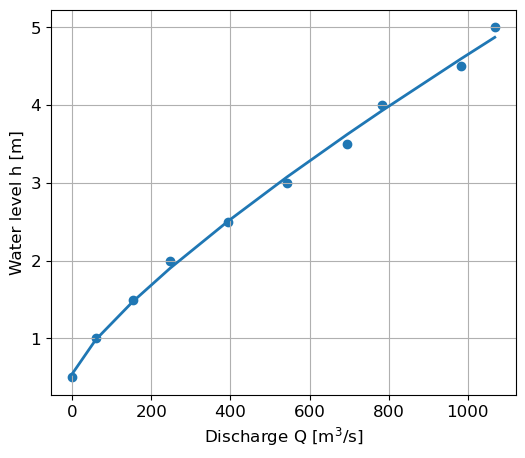

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # can be used to fit a function using non-linear least-squares 
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2})

def h_from_Q(Q, c, d, e):
    return c*Q**d + e

Q = np.array([0, 60, 153, 248, 395, 543, 695, 782, 983, 1068])
h = np.arange(0.5, 5.1, 0.5)
c, d, e = curve_fit(h_from_Q, Q, h)[0]
fig = plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1)
ax.scatter(Q, h)
ax.plot(Q, h_from_Q(Q, c, d, e))
ax.grid()
ax.set_xlabel(r'Discharge Q [m$^3$/s]')
ax.set_ylabel(r'Water level h [m]')
print(f"c = {c:.4f}, d = {d:.4f}, e = {e:.4f}") 


:::{dropdown} Answer&nbsp;{ref}`ex_qh`b
$$
Q^{0.7920} = \frac{1}{0.0173} \cdot (h - 0.5)
$$

$$ 
Q = {{\left( \frac{1}{0.0173}\cdot (h-0.5) \right)}^{\frac{1}{0.7920}}}
$$

$$  
Q = 168 (h-0.54)^{1.26}
$$
:::

:::{dropdown} Answer&nbsp;{ref}`ex_qh`c
The results are computed in the Python code below:
:::

In [5]:
b = 1/d
a = (1/c)**b
h_0 = e
Q_4m = a*(4 - h_0)**b
Q_4mdataset = 782
print(f'The discharge corresponding to the 4 m water height is {Q_4mdataset:.0f} m3/s according to the data, ') 
print(f'and {Q_4m:.0f} m3/s according to the computed Q-h relationship')

The discharge corresponding to the 4 m water height is 782 m3/s according to the data, 
and 804 m3/s according to the computed Q-h relationship


## Processing of discharge data

### Hydrographs

The discharge of a river can be graphically represented as a function of time; this is called a *hydrograph* (NL: *afvoerverlooplijn* or *hydrogram*). Often, hydrographs are compiled on an annual basis for rivers. The graph depicts the variation in discharge over the course of a year. In the hydrograph, it is evident whether a river has a continuous base flow or experiences dry periods throughout the year. {numref}`fig:continuousrunoff` illustrates the hydrograph of a river with continuous flow; the peaks are caused by high precipitation intensities resulting in rapid runoff. The hydrograph in {numref}`fig:periodicrunoff` is derived from a river with a strongly seasonal character; certain parts of the year experience dry river conditions.

```{figure} ../images/RFR_measurements_riverbaseflow.png
---
height: 300px
name: fig:continuousrunoff
---
River with a continuous base flow (called perennial river), with peaks caused by precipitation. {cite:p}`instropicsEVA` 
```

```{figure} ../images/RFR_measurements_riverseasonalflow.png
---
height: 300px
name: fig:periodicrunoff
---
River with seasonal character (called intermittent river), there are wet and dry periods. {cite:p}`instropicsEVA`
```
 
### Flow-duration curves

A flow-duration curve represents the cumulative frequency of occurrence of river discharges, in other words, it indicates the percentage of time that a specific discharge is exceeded or not exceeded (see {numref}`fig:durationcurve`).

```{figure} ../images/RFR_measurements_durationcurve.png
---
height: 300px
name: fig:durationcurve
---
Flow-duration curve which shows the percentage of time that a specific discharge is exceeded. {cite:p}`instropicsEVA` 
```

A flow-duration curve does not directly represent a useful probability distribution for daily discharge as discharges on consecutive days are highly correlated, and discharge values vary with the season. However, a flow-duration curve provides a good impression of the variability of river discharge; it can, for example, assess the impact of low flows on water usage. In this context, it is particularly important to have knowledge of the duration of periods during which a specific water level is exceeded or not exceeded. This information can be obtained from the flow-duration curve supplemented with data on the number of periods in which a discharge is exceeded or not exceeded.

(frequency-extreme-discharges)=
### Frequency of occurrence of extreme discharges

Measurements from continuous automatic discharge recording systems can provide a lot of information about the frequency of peak discharges. A series of discharge measurements becomes more useful as its length increases. However, often the length of the measurement series is too short to determine a design frequency that corresponds to the lifespan of civil works in a river.

In hydrology, two types of datasets with peak discharges are defined: a series of annual maximum discharges (*annual maximum series*) and a series of peak discharges exceeding a certain threshold value (*partial duration series*). For a series of annual maximum discharges, the discharges must be independent of each other for statistical purposes; therefore, river years are often used (see {numref}`relationship-between-rainfall-and-runoff`). {numref}`fig:datasetmetpiekafvoeren` shows an example of a dataset with different types of discharge maxima. 

```{figure} ../images/RFR_measurements_diffmaxdischarge.png
---
height: 300px
name: fig:datasetmetpiekafvoeren
---
Hydrograph with different types of maximum discharge. {cite:p}`instropicsEVA`
```

$Q_1$ to $Q_4$ form a series of annual maxima; for the series of discharges exceeding the reference level, this annual series needs to be supplemented with $Q_1$', $Q_3$', and $Q_4$'. Usually, the series of exceedances contains more values than the series of annual maxima, although this depends on the height of the threshold discharge level.

Analysis of discharge frequencies involves estimating the *peak discharge* $Q_T$ (or: *return level* - NL: *piekafvoer*, oftewel *terugkeerniveau*), which is equaled or exceeded on average once every $T$ years. Such a discharge is called a "$T$-year discharge" or a "discharge with a return period of $T$ years." The period of $T$ years is called the *return period* (NL: *herhalingstijd*), although a better term would actually be a frequency scale to make it clear that we are not talking about a fixed period of recurrence. Thus, the return period $T$ is the long-term average of the magnitude of the intervals between successive exceedances of $Q_T$. In practice, large fluctuations around this average occur; for example, a discharge that is exceeded on average once every 25 years according to the discharge series can also occur two years in a row. The datasets of annual discharges and exceedances yield different probability distributions; however, for return periods exceeding 10 years, the differences are minimal, and the annual maxima are usually used.

For an extreme discharge analysis of a river, one relies on previously measured discharges.

The distribution of maximum or minimum discharges of a river can be described by an *extreme value distribution*. In 1941, E.J. Gumbel developed his Gumbel extreme value distribution, which has since proven to be successful for hydrological applications. The *Gumbel distribution* follows from the fact that for a series of extreme values $X_1$, $X_2$, $X_3$...$X_n$, where the observations are independent and $X$ is exponentially distributed (e.g., the maximum discharge in an annual observation series), the cumulative probability of exceeding the value $x$ by $n$ observations can be approximated by:

$$
Pr(X \leq x)=F(x)=q=e^{-e^{-y}}=1-p=1-\frac{1}{T} \quad \text{[1/T]}
$$ (cumchange)

Where:

| | | | 
| --- | --- | --- |
| $p$ | Probability of an annual maximum to exceed a certain value. $p$ = Pr($X>x$) | [1/T]  |
| $q$ | Probability of an annual maximum to be smaller than a certain value. $q$ = Pr($X \leq x$) | [1/T] |
| $T$ | return period of a discharge in years | [T] |
| $y$ | reduced variate | [-] |

Thus, we have:

$$
y=-\ln(-\ln(q))=-\ln(-\ln(1-p))=-\ln \bigg(-\ln \bigg(1-\frac{1}{T} \bigg) \bigg) \quad \text{[-]}
$$ (yreduced)

To make a prediction for a maximum discharge, the distribution parameters need to be estimated. This can be done by plotting the extreme values $X_i$ against the reduced variate $y$ and fitting a straight line. For this purpose, the $y_i$ values corresponding to the $X_i$ values must be determined. The plotting position (Eq. {eq}`plotpos`) assigns a return period $T_i$ to each event, from which $y_i$ can be calculated. The following equation can be used for the plotting position:

$$
T_i=\frac{N+1}{i} \quad \text{[T]}
$$ (plotpos)

Where:
| | |
| --- | --- |
| $N$ | number of years of measurement |
| $i$ | rank number of a measured discharge in descending order |


Thus, we also have:

$$
p_i=\frac{i}{N+1} \quad \text{[1/T]}
$$ (exceedanceprob)

Where $p_i$ is the probability that a discharge is exceeded when arranging from largest to smallest, with rank number $i$ = 1 for the largest value and $i$ = $N$ for the smallest value.

With the rank numbers, the corresponding value for $T_i$ can be calculated for each extreme value. The discharge data can now be plotted on the vertical axis against the reduced variate $y$ on the horizontal axis. This results in a scatter plot from which a straight line can be drawn. The slope and intersect determine the Gumbel distribution parameters from which the peak discharges at very high return levels can be estimated.

### No discharge data available 

When no discharge data is available, one still has to rely on information about water levels in the past. One point in the graph can be determined as follows: it can be assumed that approximately once every 1.5 years ($T$ ~ 1.5 years), the river reaches its bankfull level. This corresponds to the height of the dikes or embankments along the river. Another point in the graph could come from markings by the population (for example, the highest water level in the past 20 years). Alternatively, older people can be asked if they remember high water levels and how high the water rose at that time. However, these markings of water levels can only be used if the corresponding $Q$ - $h$ curve is somewhat known. River beds, however, have often been modified over the years or centuries through normalization, construction or raising of dikes, or natural changes (river morphology), which may have altered the $Q$ - $h$ curve. Therefore, data on water levels must be handled with caution, and flow measurements should be used as much as possible.

In [6]:
# Note that the code cells below is used for the website only.

```{exercise-start}
:label: ex_gumbel
```
In a river, extreme discharges have been measured over a number of years. These are listed in the accompanying table. Based on the extreme value distribution according to Gumbel, the annual extreme discharge can be estimated from which a exceedance probability of 99% applies.


| Date | Q (m$^3$/s) |
| --- | --- |
| 24-2-1969       | 648 |
| 2-3-1969        | 686 |
| 9-3-1969        | 560 |
| 29-3-1969       | 684 |
| 15-4-1969       | 224 |
| 6-1-1970        | 774 |
| 23-2-1971       | 752 |
| 3-1-1972        | 422 |
| 8-1-1972        | 598 |
| 27-3-1972       | 690 |
| 23-1-1973       | 428 |
| 14-3-1973       | 621 |
| 24-9-1973       | 512 |
| 2-1-1974        | 534 |
| 15-3-1974       | 562 |
| 20-3-1974       | 766 |
| 24-3-1974       | 326 |
| 15-4-1974       | 686 |
| 20-4-1974       | 714 |
| 21-5-1975       | 538 |
| 14-11-1975      | 862 |
| 15-12-1975      | 638 |
| 1-1-1976        | 950 |

a) What is the return period corresponding to an exceedance probability of 99\%?

b) Determine the annual maxima and rank them from highest to lowest.

c) Compute the exceedance probabilities $p$, the non-exceedance probabilities $q$ and the return periods $T$ for rank numbers $i$ = 1, ..., 8

d) Compute the reduced variable $y$ for rank numbers $i$ = 1, ..., 8.

e) Plot the discharge against $y$ and fit a linear line through the points.

f) Compute the discharge corresponding to a non-exceedance probability of 99\%.
 
```{exercise-end}
```




:::{dropdown} Answer&nbsp;{ref}`ex_gumbel`a

For annual extremes, we have $T=\frac{1}{1-\text{P}(x<X)}$.

The result is computed in the Python code below:
:::

In [7]:
import numpy as np

p = 0.99 # Exceedance probability
T = 1/(1 - p) # Return period corresponding to exceedance probability
print(f"The return period corresponding to the given exceedance probability is equal to {T:.0f} years.")


The return period corresponding to the given exceedance probability is equal to 100 years.


:::{dropdown} Answer&nbsp;{ref}`ex_gumbel`b

The results are shown in the Python code below.

:::

In [8]:
import numpy as np
import pandas as pd

data = {
    "Date": [
        "24-2-1969", "2-3-1969", "9-3-1969", "29-3-1969", "15-4-1969",
        "6-1-1970", "23-2-1971", "3-1-1972", "8-1-1972", "27-3-1972",
        "23-1-1973", "14-3-1973", "24-9-1973", "2-1-1974", "15-3-1974",
        "20-3-1974", "24-3-1974", "15-4-1974", "20-4-1974", "21-5-1975",
        "14-11-1975", "15-12-1975", "1-1-1976"
    ],
    "Q (m$^3$/s)": [
        648, 686, 560, 684, 224, 774, 752, 422, 598, 690,
        428, 621, 512, 534, 562, 766, 326, 686, 714, 538,
        862, 638, 950
    ]
}

df = pd.DataFrame(data)

# Convert "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract year from "Date" column
df['Year'] = df['Date'].dt.year

# Find the maximum value for each year
annual_maxima_sorted = df.groupby('Year')['Q (m$^3$/s)'].max().sort_values(ascending=False).reset_index()

# Add a column with the rank of each row
annual_maxima_sorted['Rank'] = annual_maxima_sorted['Q (m$^3$/s)'].rank(ascending=False)

annual_maxima_sorted.set_index('Rank', inplace = True)

annual_maxima_sorted = annual_maxima_sorted.rename(columns={'Q (m$^3$/s)': 'Annual maximum [m^3/s]'})

display(annual_maxima_sorted)

,Year,Annual maximum [m^3/s]
Rank,,
1.0,1976,950
2.0,1975,862
3.0,1970,774
4.0,1974,766
5.0,1971,752
6.0,1972,690
7.0,1969,686
8.0,1973,621


:::{dropdown} Answer&nbsp;{ref}`ex_gumbel`c

The plot position can be used to determine the exceedance and non-exceedance probabilities for each extreme value. This is done using:

$$
\text{P}_i=\frac{i}{N+1}
$$

In the case of a high-to-low ranking, P$_{i}$ is the exceedance probability $p$. The non-exceedance probabilities can be computed using $q = 1 - \text{P}_i$.

and $T$ is calculated as:

$$
T_i=\frac{N+1}{i}
$$

The results are computed in the Python code below:
:::

In [9]:
import pandas as pd
import numpy as np

rank_number = np.arange(1, 9, 1)
ann_max = np.array([950, 862, 774, 766, 752, 690, 686, 621])
N = len(rank_number)
p = rank_number / (N + 1)
q = 1 - p
T = (N + 1) / rank_number
results = pd.DataFrame({'Annual maximum [m^3/s]': ann_max, 'p [1/year]': p, 'q [1/year]': q, 'T [years]': T}, index= rank_number).round(3)
results

,Annual maximum [m^3/s],p [1/year],q [1/year],T [years]
1,950,0.111,0.889,9.000
2,862,0.222,0.778,4.500
3,774,0.333,0.667,3.000
4,766,0.444,0.556,2.250
5,752,0.556,0.444,1.800
6,690,0.667,0.333,1.500
7,686,0.778,0.222,1.286
8,621,0.889,0.111,1.125


:::{dropdown} Answer&nbsp;{ref}`ex_gumbel`d
The reduced variable $y$ is calculated as:

$$
y=-\ln(-\ln(\text{P}(x<X)))=-\ln \bigg(-\ln \bigg(1-\frac{1}{T} \bigg) \bigg)
$$

The results are computed in the Python code below:
:::

In [10]:
import numpy as np
y = -1*np.log(-1*np.log(1-1/T))

results = pd.DataFrame({'Annual maximum [m^3/s]': ann_max, 'p [1/year]': p, 'q [1/year]': q, 'T [years]': T, 'y [-]': y}, index= rank_number).round(3)
results

,Annual maximum [m^3/s],p [1/year],q [1/year],T [years],y [-]
1,950,0.111,0.889,9.000,2.139
2,862,0.222,0.778,4.500,1.381
3,774,0.333,0.667,3.000,0.903
4,766,0.444,0.556,2.250,0.531
5,752,0.556,0.444,1.800,0.210
6,690,0.667,0.333,1.500,-0.094
7,686,0.778,0.222,1.286,-0.408
8,621,0.889,0.111,1.125,-0.787



:::{dropdown} Answer&nbsp;{ref}`ex_gumbel`e
The results are computed in the Python code below:
:::

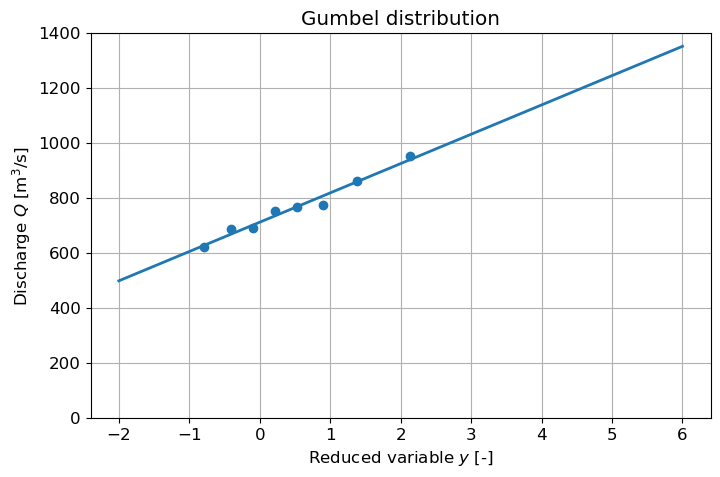

In [11]:
def linear(x, a, b):
    return a*x + b
a, b = curve_fit(linear, y, ann_max)[0]
y_ex = np.arange(-2, 7, 1)
plt.figure(figsize=(8,5))
plt.scatter(y, ann_max)
plt.plot(y_ex, a*y_ex + b)
plt.grid('on')
plt.ylabel(r'Discharge $Q$ [m$^3$/s]')
plt.xlabel(r'Reduced variable $y$ [-]')
plt.title('Gumbel distribution')
plt.ylim(0, 1400);


:::{dropdown} Answer&nbsp;{ref}`ex_gumbel`f
A non-exceedance probability of 99\% corresponds to a return period of $T$ = 100 years (as determined in question a).
Using $\displaystyle y=-\ln \bigg(-\ln \bigg(1-\frac{1}{T} \bigg) \bigg)$, we find that for $T$ = 100 years, $y$ = 4.6.
Now we can use the fitted line to compute the corresponding discharge (see the code below).
:::

In [12]:
Q_100yr = linear(4.6, a, b)
print(f'The discharge corresponding to a non-exceedance probability of 99% = {Q_100yr:.0f} m3/s')

The discharge corresponding to a non-exceedance probability of 99% = 1201 m3/s


In [13]:
# Note that the code cells below is used for the website only.
from jupyterquiz import display_quiz

```{exercise-start}
:label: mc_runoff_meas
```
Answer the following questions.


```{exercise-end}
```

In [14]:
q1 = [{
        "question": "True or false? A hydrograph clearly shows whether a river is a perennial river.",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "True",
                "correct": True,
                "feedback": "Correct! A hydrograph depicts the variation in discharge over the course of a year. Perennial rivers show continuous flow, while intermittent rivers have periods of zero flow."
            },
            {
                "answer": "False",
                "correct": False,
                "feedback": "Incorrect! A hydrograph shows the flow rate of a river over time. For a perennial river, the hydrograph will display continuous flow throughout the year, even during dry periods. In contrast, non-perennial rivers will show periods of no flow, indicating that the river does not consistently have water. Therefore, the pattern in the hydrograph does reveal if a river is perennial."
            }
        ]
    }]
display_quiz(q1)

<IPython.core.display.Javascript object>

In [15]:

q2 = [{
        "question": "For prediction of extreme discharge, the Gumbel extreme value analysis may (preferably) not be applied to water levels. Under one condition this is allowed, which condition is this?",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "When there is backwater due to shipping.",
                "correct": False,
                "feedback": "Incorrect! Gumbel extreme value analysis can be applied to water levels only if there is a consistent and stable water level-discharge relationship (rating curve). Backwater disrupts the water level-discharge relationship, causing water levels to inaccurately represent discharge. Gumbel analysis requires a stable relationship, which backwater invalidates."
            },
            {
                "answer": "When the measurement series is equidistant and continuous.",
                "correct": False,
                "feedback": "Incorrect! Gumbel extreme value analysis can be applied to water levels only if there is a consistent and stable water level-discharge relationship (rating curve). While equidistant and continuous data are ideal for consistent analysis and trend detection, they don’t guarantee a stable water level-discharge relationship. Gumbel analysis depends on this relationship, not just data regularity."
            },
            {
                "answer": "When the measurement series is short enough.",
                "correct": False,
                "feedback": "Incorrect! A short series lacks sufficient extreme events for reliable Gumbel analysis. Accurate prediction requires a long record to capture rare, high-magnitude events."
            },
            {
                "answer": "When the cross-section of a river does not include floodplains and there are no dam effects.",
                "correct": True,
                "feedback": "Correct! When a river's cross-section does not include floodplains and there are no dam effects, the relationship between water levels and discharge becomes more predictable and consistent. In this case, water levels increase more uniformly with discharge, as the cross-sectional area remains relatively constant. This allows for the Gumbel extreme value analysis to be applied to water levels because the predictable relationship ensures that extreme water levels correspond more directly to extreme discharge events."
            }
        ]
    }]
display_quiz(q2)

<IPython.core.display.Javascript object>

In [16]:
q3 = [{
        "question": "True or false? The larger the Manning roughness coefficient, the larger the flow velocity of the river.",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "True",
                "correct": False,
                "feedback": "Incorrect! Have a look at the example below, and then come back to this question."
            },
            {
                "answer": "False",
                "correct": True,
                "feedback": r"Correct! The Manning roughness coefficient $n_m$ represents the roughness of the riverbed, which increases resistance to flow. According to the Manning equation, flow velocity is inversely proportional to $n_m$, meaning that a higher roughness coefficient results in a lower flow velocity. A larger $n_m$ indicates more friction from the riverbed or obstructions, slowing down the water movement. Therefore, a smoother channel with a lower $n_m$ will allow water to flow faster compared to a rougher channel with a higher $n_m$."
            }
        ]
    }]
display_quiz(q3)

<IPython.core.display.Javascript object>

:::{dropdown} Example - Influence of Manning coefficient on flow velocity

Let's consider Manning's Equation to calculate the discharge [{eq}`Qstricklermanning`].

$$
Q = \frac{A_cR^{2/3}\sqrt{s}}{n_m} \quad \text{[L$^3$/T]}
$$

Filling in Equation {eq}`Qstricklermanning` for the hydraulic radius:

$$
Q = \frac{A_c^{5/3}\sqrt{s}}{P_w^{2/3}n_m} \quad \text{[L$^3$/T]}
$$

Filling in {eq}`A` and {eq}`Pw` for the cross-sectional area and wetted perimeter of the watercourse:

$$
Q = \frac{((b+mh)h)^{5/3}\sqrt{s}}{(b+2h\sqrt{1+m^2})^{2/3}n_m} \quad \text{[L$^3$/T]}
$$

Additionally, we have:

$$
v = Q / A_c
$$

Let's assume the following values:

- Q = 10 m<sup>3</sup>/s
- b = 20 m
- $n_m$ = 0.04
- m = 1
- s = 0.001

Compute h and v using a solver, e.g. Excel, Python, graphing calculator (an example is provided in the code cell below):
- h = ?
- v = ?

Now, we halve n<sub>m</sub>. How does that influence the values of h and v?
- h<sub>new</sub> = ?
- v<sub>new</sub> = ?

:::


In [17]:
from scipy.optimize import fsolve

def discharge(h, Q_var, b, n_m, m, s):
    return Q_var - ((b+m*h)*h)**(5/3)*np.sqrt(s)/((b+2*h*np.sqrt(1+m**2))**(2/3)*n_m)

def velocity(v, h, Q_var, b, m):
    return v - Q_var/((b+m*h)*h)

# Initial situation

Q_var = 40 # m3/s
b = 20 # m
n_m_1 = 0.04
m = 1
s = 0.01
h_guess = 1 # m
v_guess = 1 # m/s

h_1 = fsolve(discharge, h_guess, args=(Q_var, b, n_m_1, m, s))
v_1 = fsolve(velocity, v_guess, args=(h_1, Q_var, b, m))

print(f"The water depth in the initial situation (Manning coefficient = {n_m_1}) is equal to {h_1[0]:.2f} m.")
print(f"The flow velocity in the initial situation (Manning coefficient = {n_m_1}) is equal to {v_1[0]:.2f} m/s.")

# New situation

n_m_2 = n_m_1 / 2

h_2 = fsolve(discharge, h_guess, args=(Q_var, b, n_m_2, m, s))
v_2 = fsolve(velocity, v_guess, args=(h_2, Q_var, b, m))

print(f"The water depth in the new situation (Manning coefficient = {n_m_2}) is equal to {h_2[0]:.2f} m.")
print(f"The flow velocity in the new situation (Manning coefficient = {n_m_2}) is equal to {v_2[0]:.2f} m/s.")



The water depth in the initial situation (Manning coefficient = 0.04) is equal to 0.88 m.
The flow velocity in the initial situation (Manning coefficient = 0.04) is equal to 2.18 m/s.
The water depth in the new situation (Manning coefficient = 0.02) is equal to 0.58 m.
The flow velocity in the new situation (Manning coefficient = 0.02) is equal to 3.36 m/s.


As a summary, the relationship between Manning's roughness coefficient of a watercourse and the associated water depth and flow velocity (with a fixed discharge) is illustrated in figure {numref}`fig:Manning_h_v` below.

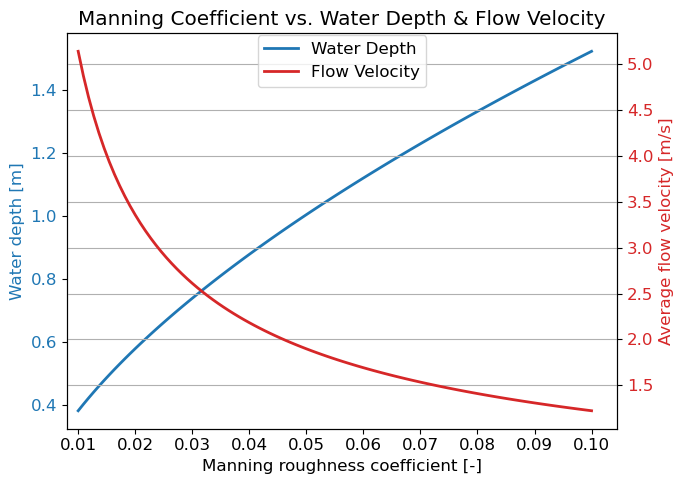

In [18]:
h_guess = 1
Q_fix = 40 # m3/s
n_m = np.linspace(0.01, 0.1, 100)

h_arr = np.zeros(len(n_m))
v_arr = np.zeros(len(n_m))
for i in range(len(n_m)):
    h_arr[i] = fsolve(discharge, h_guess, args=(Q_fix, b, n_m[i], m, s))[0]
    v_arr[i] = Q_fix/((b+m*h_arr[i])*h_arr[i])

fig, ax1 = plt.subplots(figsize = (7,5))

# Plot Manning coefficients on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Manning roughness coefficient [-]')
ax1.set_ylabel('Water depth [m]', color=color)
ax1.plot(n_m, h_arr, color=color, label = 'Water Depth')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(left=0.008)

x_values = np.arange(0.01, 0.11, 0.01)
ax1.set_xticks(x_values)  # Explicitly set x-axis ticks
ax1.set_xticklabels([f"{x:.2f}" for x in x_values])

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot flow velocities on the second y-axis
color = 'tab:red'
ax2.set_ylabel('Average flow velocity [m/s]', color=color)
ax2.plot(n_m, v_arr, color=color, label = 'Flow Velocity')
ax2.tick_params(axis='y', labelcolor=color)

# Title and show the plot
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.93), ncol=1)
plt.title('Manning Coefficient vs. Water Depth & Flow Velocity')
fig.tight_layout()
plt.grid()
plt.show()


```{figure} ../images/HNL_surfacewater_pieecharts.jpg
---
height: 0px
name: fig:Manning_h_v
---
Relationship between Manning's roughness coefficient and water depth and flow velocity under a fixed discharge and standardized river profile. (Own work)
```